<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Clase_37_Workshop_Python_Multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Workshop Python 

En esta primera intervención del workshop vamos a trabajar con los siguientes paquetes:

* Pandas.
* Seaborn.
* Matplotlib

In [2]:
#Importamos los paquetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

El **dataset** que vamos a utilizar se denomina **"tips"** y contiene los datos que un camarero registró sobre cada propina que recibió durante un período de unos meses trabajando en un restaurante. Podemos encontrar el link al dataset en un repositorio público en GitHub.

Link: 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'

1. Para este primer paso, procederemos a realizar la importación del archivo:

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv', sep=',', decimal='.')

2. Visualizar las primeras filas del dataframe

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


3. Generar las estadisticas descriptivas del df a través del uso de la función describe().

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


4. Imprimir por pantalla el shape del df

In [7]:
df.shape

(244, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [15]:
np.where(df.sex.isnull().values)

(array([], dtype=int64),)

In [18]:
import numpy as np
son_nulos=df.iloc[np.where(df.sex=='Male')]


# Scatter plot
-------------
5. Crear un scatterplot entre x='total_bill' - y='tip' a través del uso de la Librería Seaborn


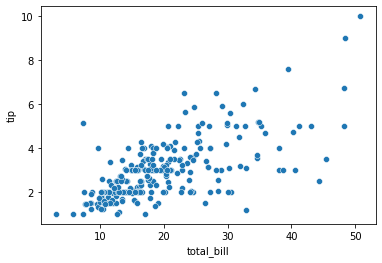

In [19]:
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

6. Modificar el tamaño del plot por ancho = 20, alto= 10. Tip: Hay que utilizar plt.figure

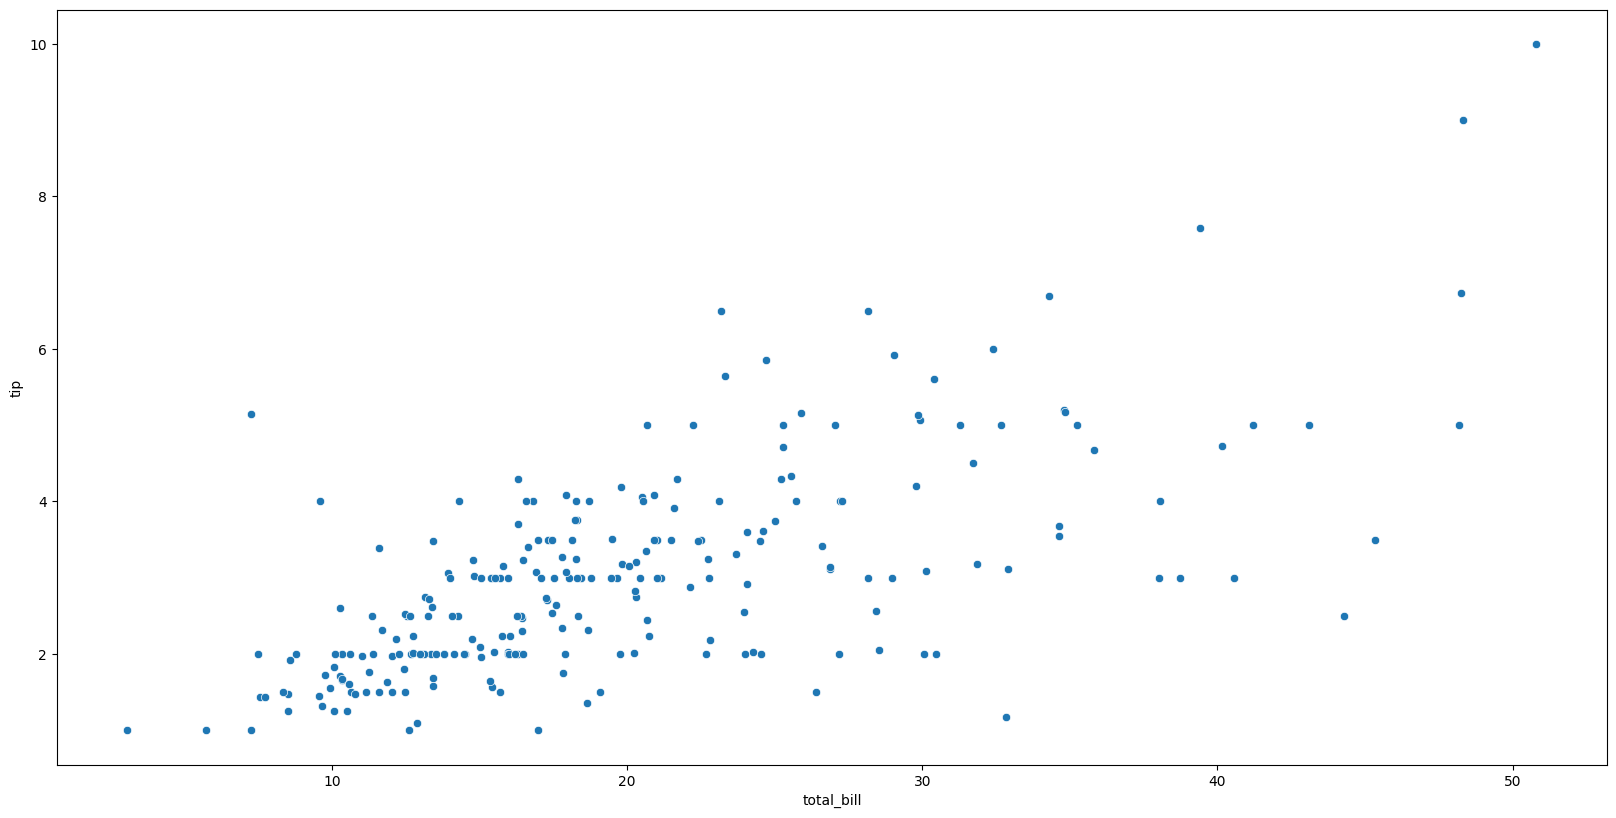

In [23]:
plt.figure(figsize=(20,10),dpi=100)
sns.scatterplot(x='total_bill',y='tip',data=df)
plt.show()

7. Cambiar el color por defecto que tiene el grafico por el color verde

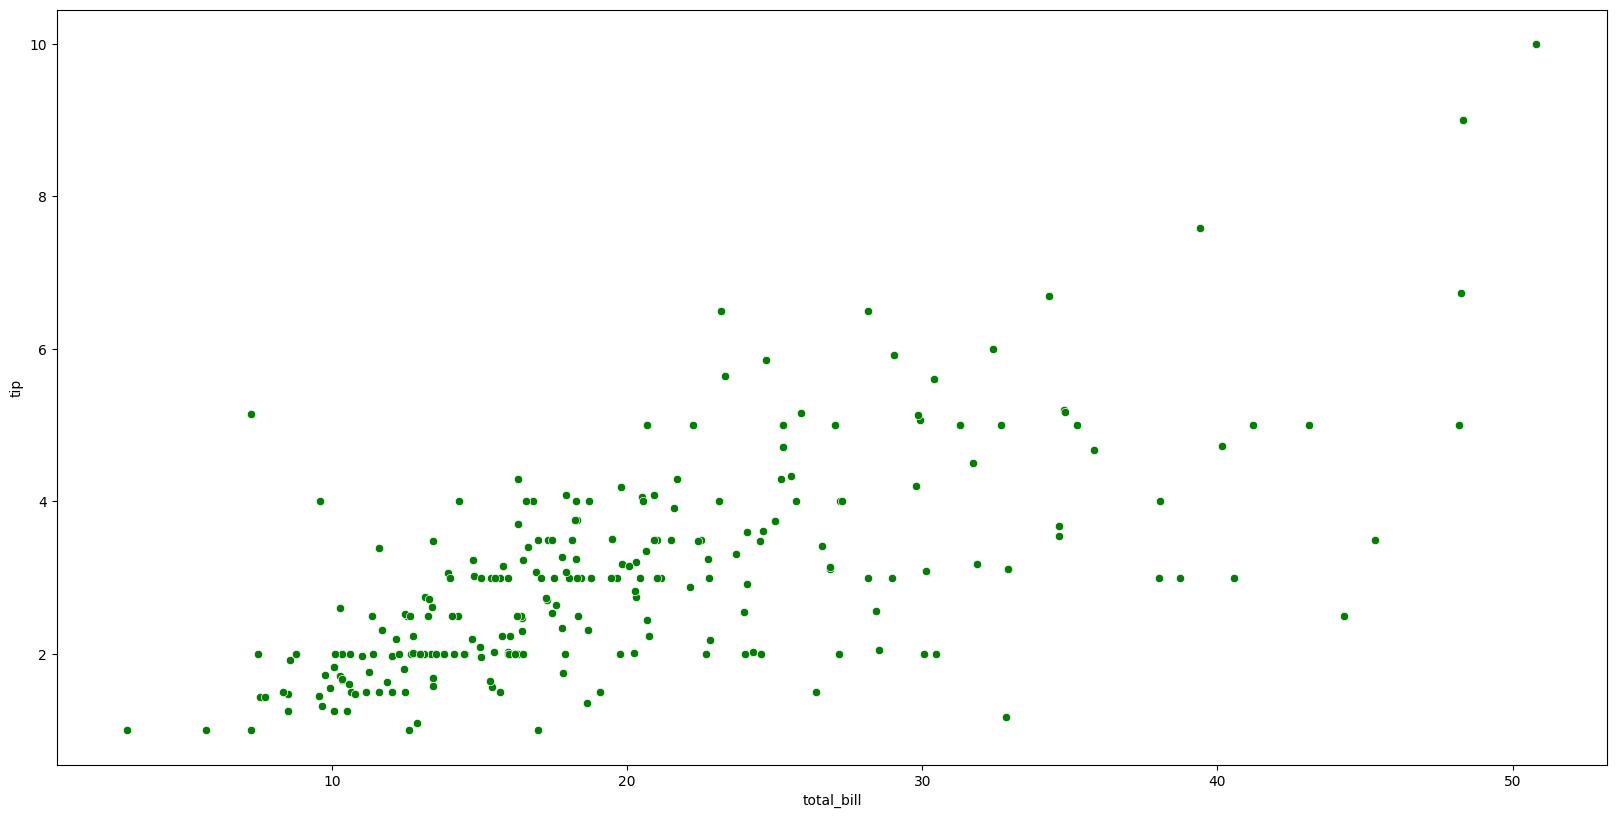

In [26]:
plt.figure(figsize=(20,10),dpi=100)
sns.scatterplot(x='total_bill',y='tip',data=df, color='green')
plt.show()

8. Asignar un color en base a la variable "sex". Tip: Hay que utilizar el atributo - hue

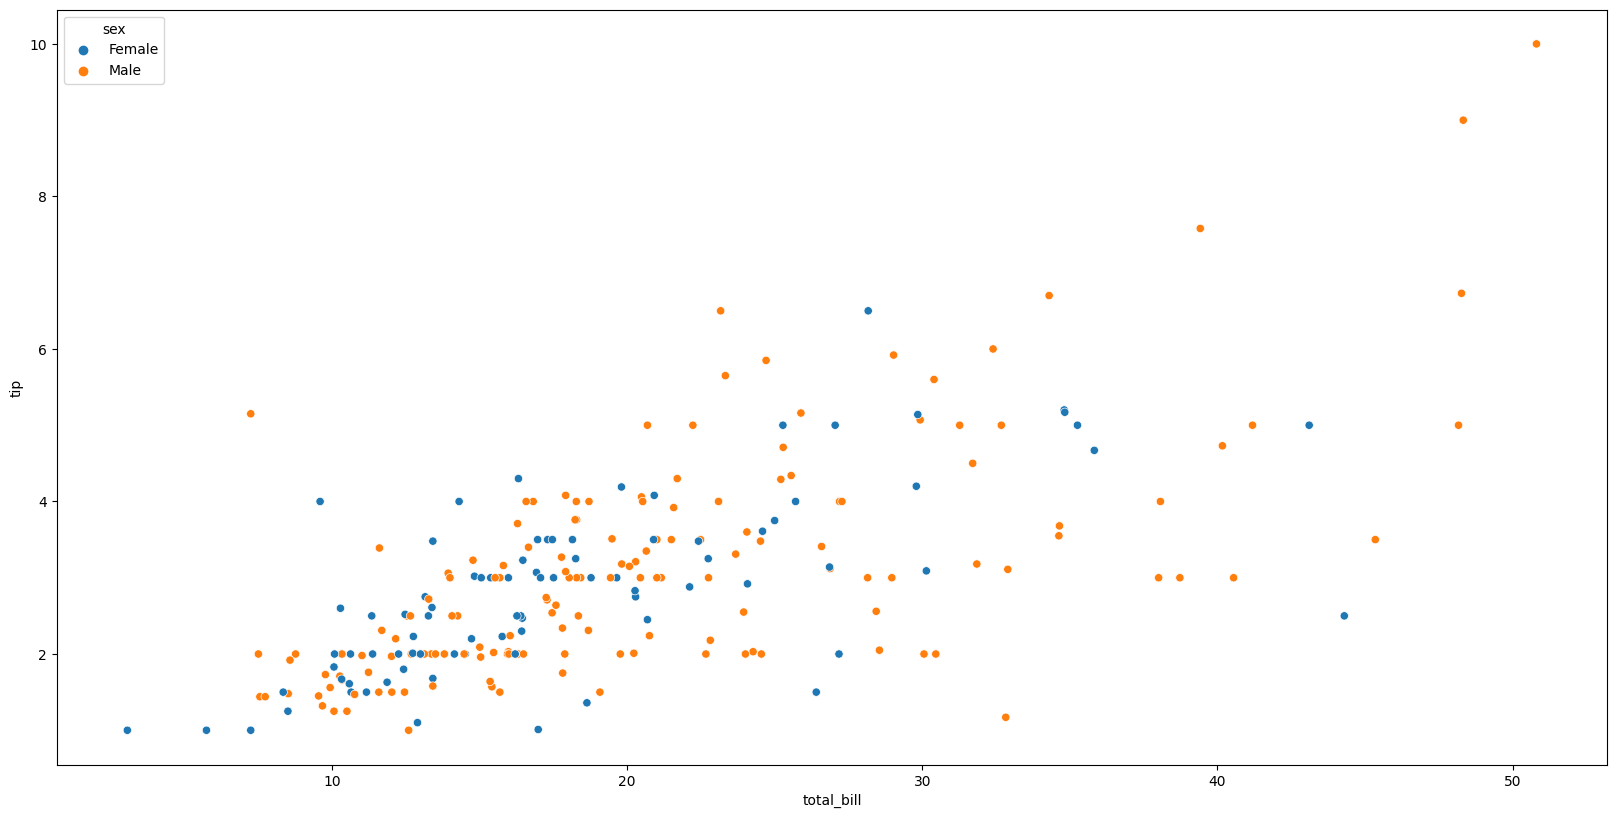

In [27]:
plt.figure(figsize=(20,10),dpi=100)
sns.scatterplot(x='total_bill',y='tip',data=df, hue='sex')
plt.show()

In [28]:
df.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


9. Asignar un forma diferente a cada point en base a los valores de la variable denominada "smoker". Tip: Hay que utilizar el atributo - style

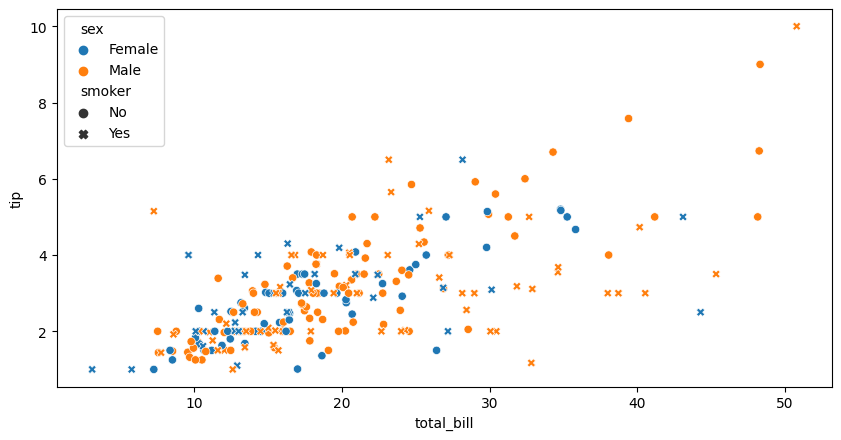

In [32]:
plt.figure(figsize=(10,5),dpi=100)
sns.scatterplot(x='total_bill',y='tip',data=df, hue='sex',style='smoker')
plt.show()

10. Agregar a nuestro gráfico los siguientes labels:

* Titulo: "Importe del Tickets vs Propinas"
* Eje x: "Importe del Tickets"
* Eje y: "Propinas"


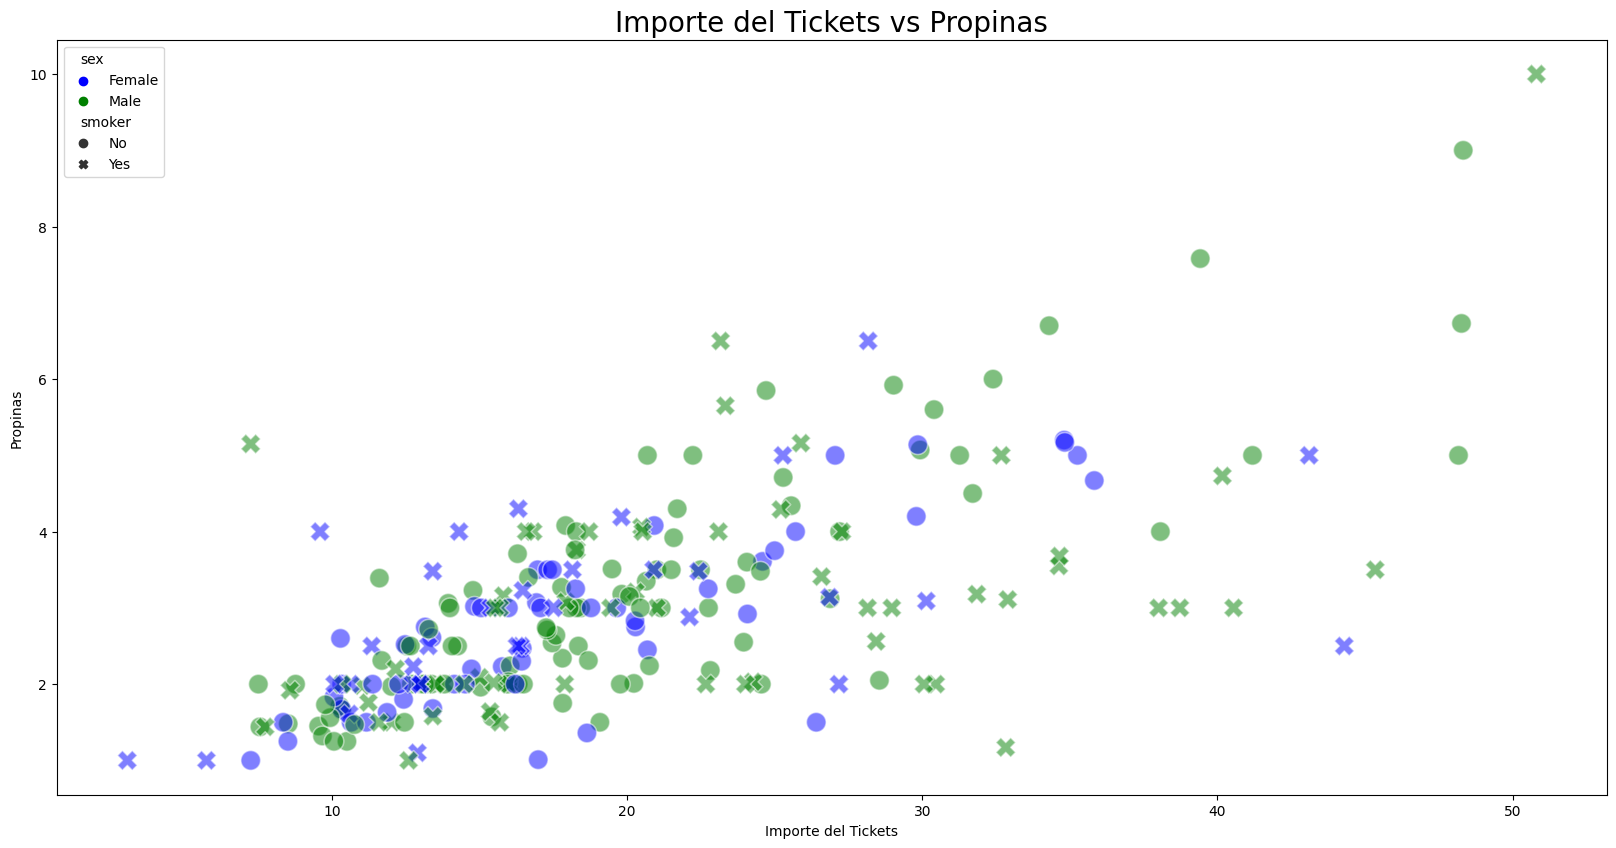

In [36]:
p={'Female':'blue','Male':'green'}

plt.figure(figsize=(20,10),dpi=100)
sns.scatterplot(x='total_bill',y='tip',data=df, hue='sex',style='smoker',s=200,alpha=0.5,palette=p)
plt.xlabel('Importe del Tickets')
plt.ylabel('Propinas')
plt.title ('Importe del Tickets vs Propinas',fontsize=20)
plt.show()

# Distplot

1. Generar un histograma para la variable total_bill


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


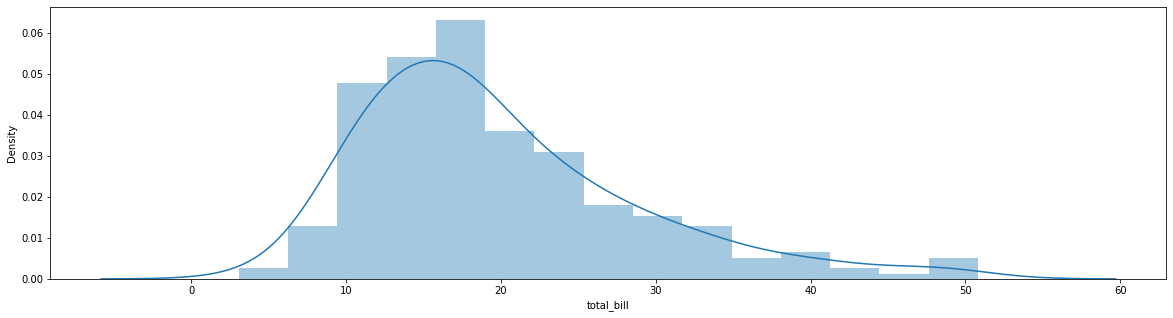

In [43]:
plt.figure(figsize=(20,5))
sns.distplot(df.total_bill,hist=True,kde=True,bins=15)
plt.show()

2. Comparar en una misma gráfica las distribuciones de total_bill y tip



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


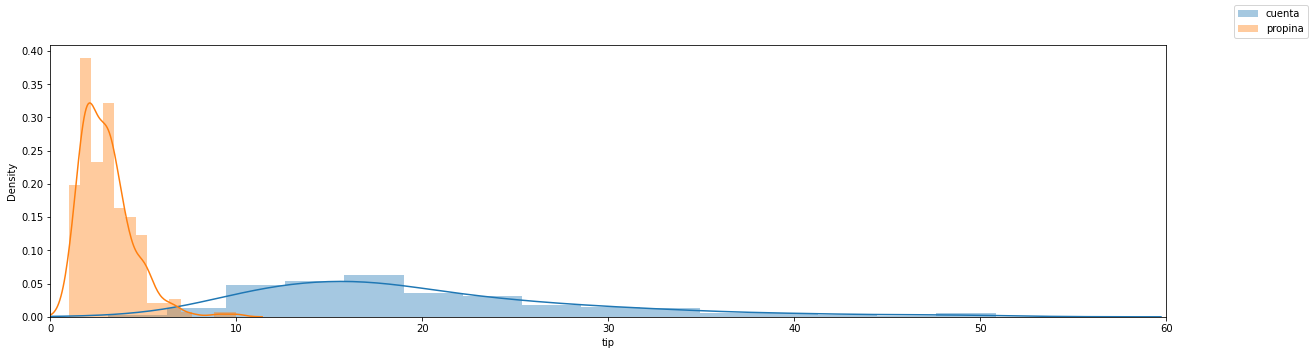

In [47]:
fig=plt.figure(figsize=(20,5))

sns.distplot(df.total_bill,hist=True,kde=True,bins=15,label='cuenta')
sns.distplot(df.tip,hist=True,kde=True,bins=15,label='propina')
fig.legend()
plt.xlim(0,60)
plt.show()

# Barplot

1. Generar un barplot donde en el eje x se encuentre la variable day

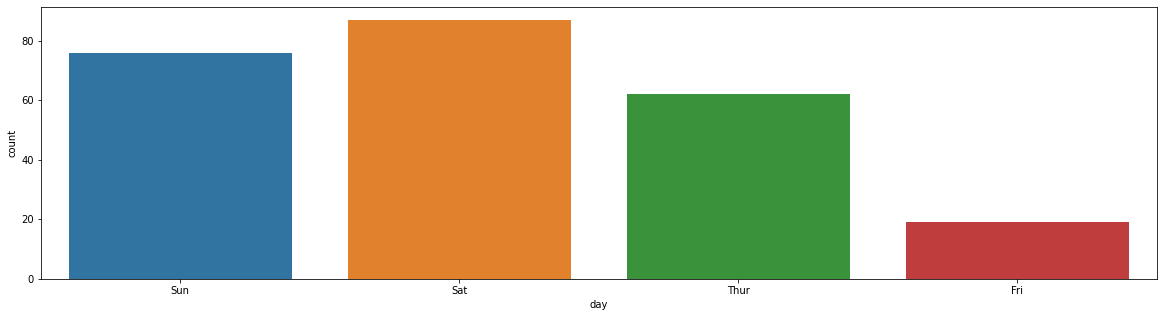

In [49]:
plt.figure(figsize=(20,5))
sns.countplot(x='day',data=df)
plt.show()

2. Modificar el gráfico anterior haciendo que el eje y ahora sea day.

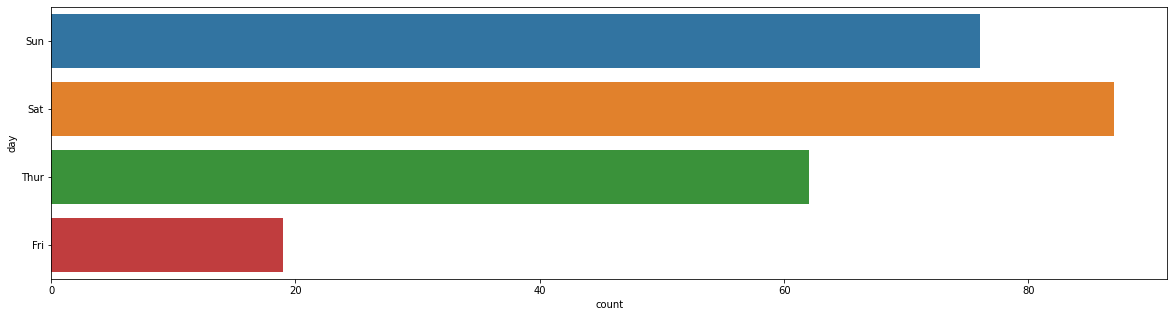

In [50]:
plt.figure(figsize=(20,5))
sns.countplot(y='day',data=df)
plt.show()

# Boxplot

1. Generar un boxplot donde x = day e y = total_bill, asignar los colores siguientes:

*   #008B8B
*   #00FFFF

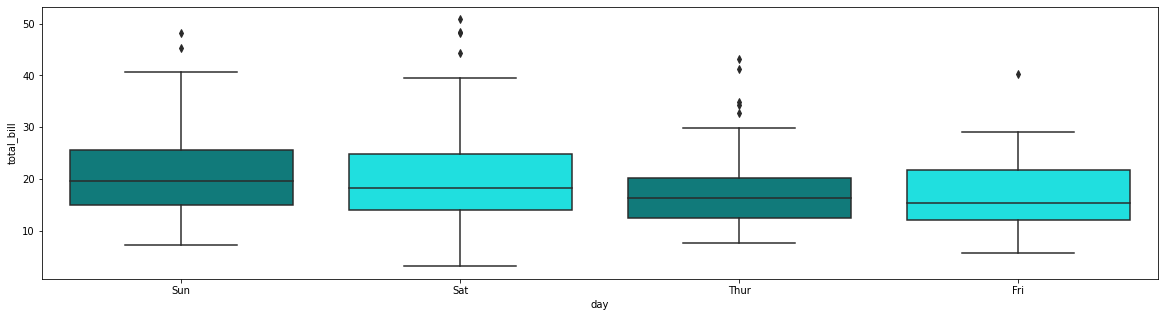

In [51]:
plt.figure(figsize=(20,5))
sns.boxplot(x='day',y='total_bill', data=df,  palette=['#008B8B','#00FFFF'])
plt.show()

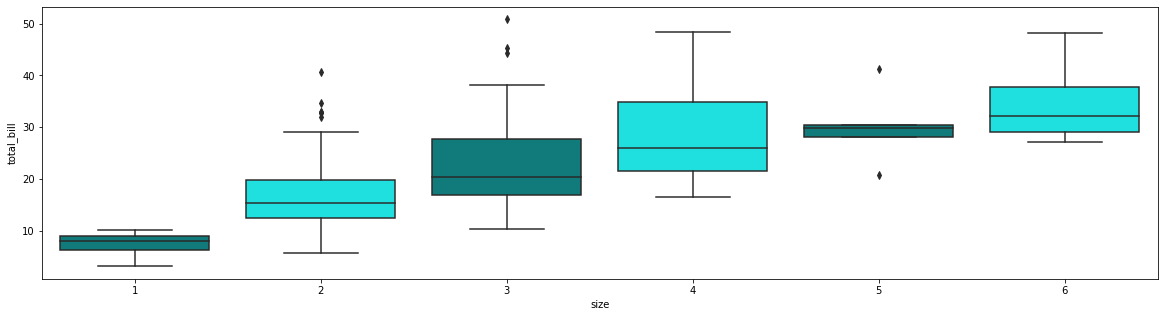

In [52]:
plt.figure(figsize=(20,5))
sns.boxplot(x='size',y='total_bill', data=df,  palette=['#008B8B','#00FFFF'])
plt.show()

3. Agregamos la variable "sex". Tip: Hay que utilizar - hue

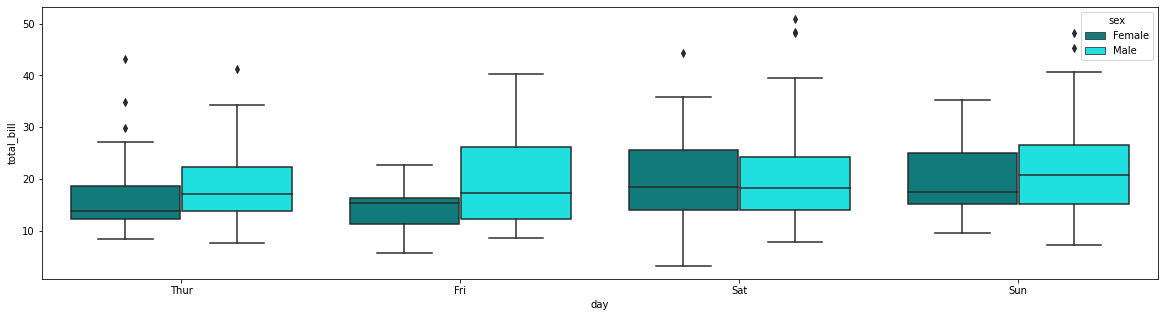

In [56]:
plt.figure(figsize=(20,5))
sns.boxplot(x='day',y='total_bill',hue='sex', data=df, order=['Thur','Fri','Sat','Sun'], palette=['#008B8B','#00FFFF'])
plt.show()

# Violin Plot

Crear un violin plot donde x = day e y = total_bill, asignar los mismos colores utilizados en el boxplot.

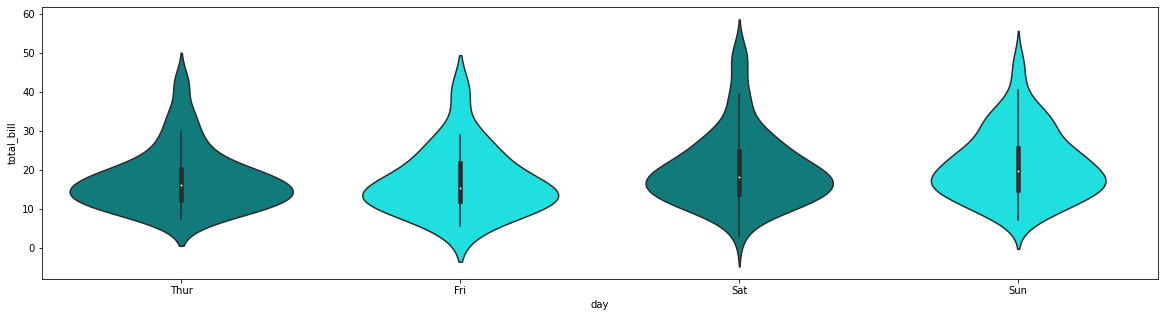

In [58]:
plt.figure(figsize=(20,5))
sns.violinplot(x='day',y='total_bill', data=df,  palette=['#008B8B','#00FFFF'], order=['Thur','Fri','Sat','Sun'])
plt.show()

En esta sección del workshop acudiremos a la librería **Plotly** para la creación de gráficos interactivos. 

1.Importar el paquete plotly.express

In [59]:
import  plotly.express as px

-----------------------------
# Scatterplot con Plotly

1. Generar un scatter plot donde el eje x es "total_bill" y el eje y es "tip"

In [61]:
fig=px.scatter(df,x='total_bill', y='tip')
fig.show()

2. Asignar los colores en base a la variable "day"

In [63]:
fig=px.scatter(df,x='total_bill', y='tip', color='day',size='size')
fig.show()

3. Modificar el tamaño de los points en base a la variable "size"

In [ ]:
#Completar

4. Generar un scatter plot en 3d donde la variable **"x"** es "total_bill", la variable **"y"** es "tip" y la variable **"z"** es "size"

In [66]:
fig=px.scatter_3d(df,x='total_bill', y='tip',z='size',color='day')
fig.show()

5. Modificar el grafico anterior y asignar un color en base a la variable "day"


In [ ]:
#Completar

# Violin Plot

Generar un box plot donde el eje x es "smoker" y el eje y es "total_bill"

In [67]:
fig=px.violin(df,x='smoker', y='total_bill', box=True)
fig.show()

# Pie Plot

1. Crear un pie plot en base a names="smoker", values='total_bill'

In [69]:
fig=px.pie(df,names='smoker', values='total_bill')
fig.show()

In [70]:
fig=px.pie(df,names='smoker', values='total_bill',hole=0.4)
fig.show()

In [ ]:
2. Crear un pie plot en base a names="day", values='tip'

In [72]:
fig=px.pie(df,names='day', values='tip',hole=0.4)
fig.show()

# Box

Generar un box plot donde el eje x = day y el eje y = total_bill

In [73]:
fig=px.box(df,x='day', y='total_bill')
fig.show()